In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from ipywidgets import widgets, interactive
from IPython.core.display import Image

## Analysis1 - Find the “top performing” counties in California 

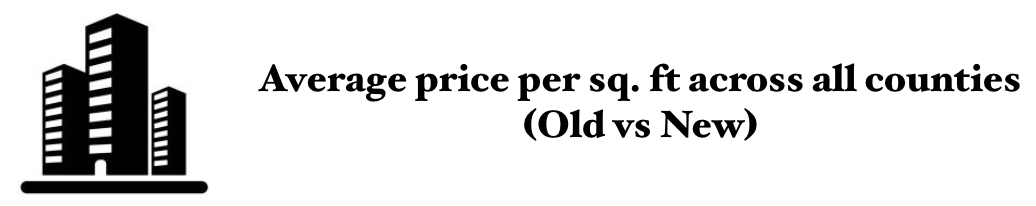

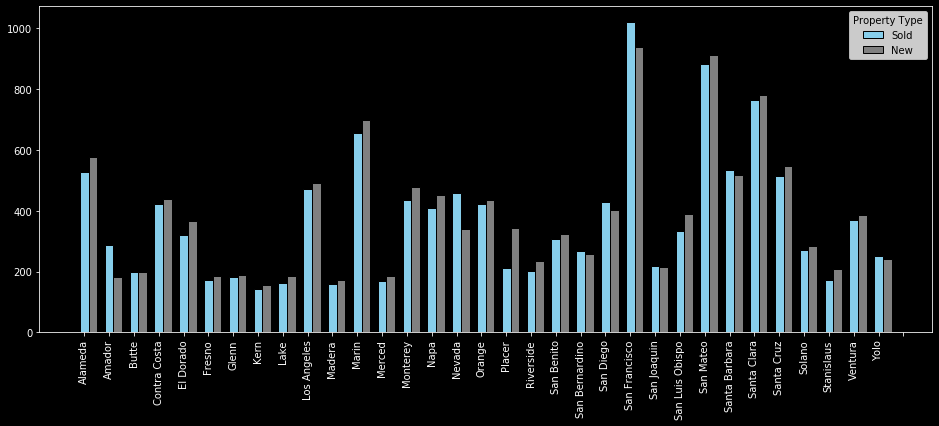

In [3]:
## Method to remove outliers. This will help in logical analysis of data.
def removeOutliers(x, outlierConstant):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = [lower_quartile - IQR, upper_quartile + IQR]
    resultList = []
    for y in a:
        if y >= quartileSet[0] and y <=quartileSet[1]:
            resultList.append(y)
    return resultList


## Program to calculate and plot average price per sq ft of all properties sold and all properties listed for each county.
sold_avg=dict()
new_avg=dict()


#Read the data of New Listing
dfn=pd.read_excel('Redfin_New_Cleaned.xlsx')
dfn=dfn.dropna(subset=['per_sq_ft','county']) #remove rows where price per sq ft is not present in Sold List
new_counties=dfn['county'].unique()

#Read the data of Sold Listing
dfs=pd.read_excel('Redfin_Sold_Cleaned.xlsx')
dfs=dfs.dropna(subset=['per_sq_ft','county']) #remove rows where price per sq ft is not present in New List
sold_counties=dfs['county'].unique()

#Find the counties common in New and Sold Listing
a_set = set(new_counties) 
b_set = set(sold_counties) 

all_counties=list(a_set.intersection(b_set))
all_counties.sort()

#Find the Average Price Per SqFt for all counties in Sold and New Listing
for county in all_counties:
    sold=list(dfs[dfs['county']==county].per_sq_ft)
    new=list(dfn[dfn['county']==county].per_sq_ft)
    sold=removeOutliers(sold, 1.5)
    new=removeOutliers(new,1.5)
    if len(sold)>0:
        mean_sold=sum(sold)/len(sold)
        sold_avg[county]=mean_sold
    if len(new)>0:
        mean_new=sum(new)/len(new)
        new_avg[county]=mean_new

        
#Plot a side by side bar graph to show Avg Price per sq ft for all counties (Sold and New)
x = list(sold_avg.keys())
y = list(sold_avg.values())
z = list(new_avg.values())
barWidth = 0.35
r1 = np.arange(len(y))
r2 = [x + barWidth for x in r1]

with plt.style.context('dark_background'):
    fig,ax=plt.subplots(figsize=(16,6))
    ax.bar(r1, y, color='skyblue', width=barWidth, edgecolor='k', label='Sold')
    ax.bar(r2, z, color='grey', width=barWidth, edgecolor='k', label='New')

ax.set_xticks(range(34))
ax.set_xticklabels(x,rotation=90)
ax.legend(loc = 'upper right',title="Property Type")
ax.tick_params(colors='white', direction='out')
Image(filename="Title1_W3.png",width=700, height=50)

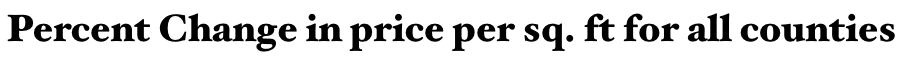

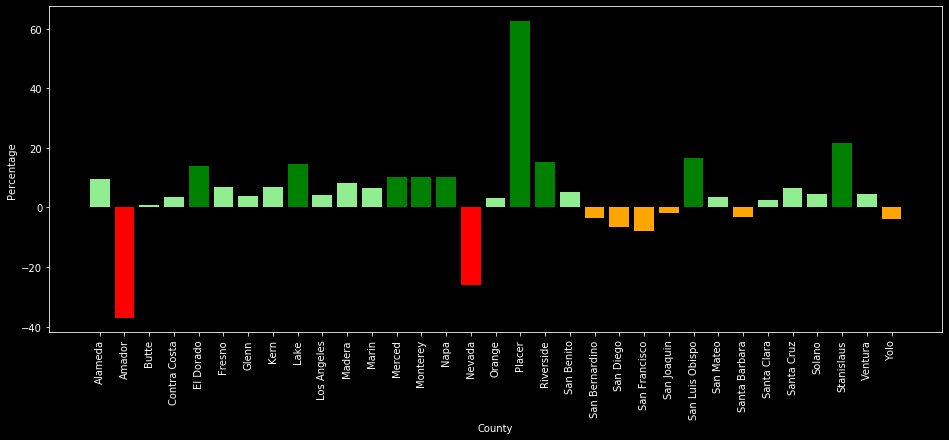

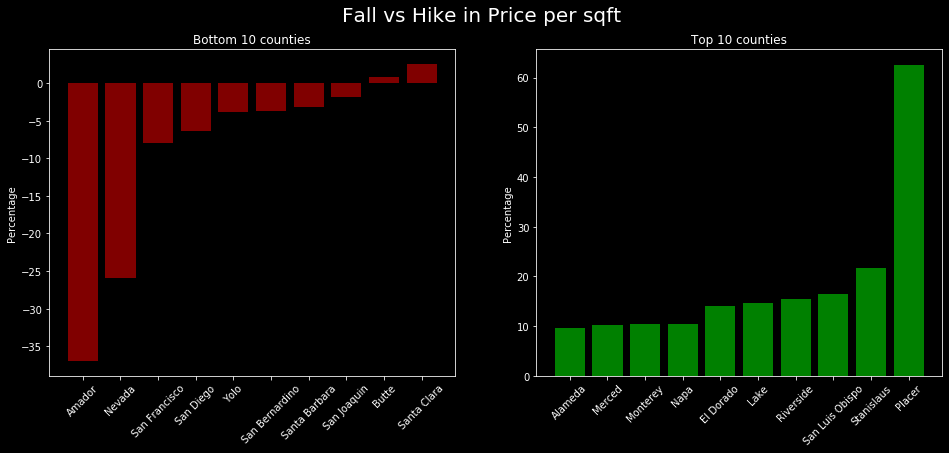

In [4]:
difference=[]
difference_pct=[]
colors=[]
sold_value = list(sold_avg.values())

#Find percent change in price per sqft for all counties
for county in all_counties:
    difference.append(new_avg[county]-sold_avg[county])

for i in range(len(sold_value)):
    if sold_value[i]>0:
        difference_pct.append(difference[i]*100/sold_value[i])
    else:
        difference_pct.append(0)

#Plot bar graph for all counties showing percent hike/fall in price per sqft        
for diff in difference_pct:
    if diff<-20:
        colors.append('red')
    elif diff<0:
        colors.append('orange')
    elif diff<10:
        colors.append('lightgreen')
    else:
        colors.append('green')
with plt.style.context('dark_background'):
    fig,ax=plt.subplots(figsize=(16,6))
    x = list(sold_avg.keys())
    ax.bar(x,difference_pct,color=colors, align='center')
    ax.set_xticklabels(x,rotation=90)
    ax.set_ylabel("Percentage")
    ax.set_xlabel("County")
    #fig.suptitle("Countywise % change in Price Per Sqft")
Image(filename="Title2.png")
#plt.show()


dict_county_pct=dict(zip(x,difference_pct))
sorted_d = dict(sorted(dict_county_pct.items(), key=lambda x: x[1]))

#Make 2 dictionaries with Top 10 and Bottom 10 performers by counties 
dict_decline=dict(list(sorted_d.items())[0:10])

dict_hike=dict(list(sorted_d.items())[-10:])


#Sub-Plot graphs showing Top 10 and Bottom 10 performers by counties
with plt.style.context('dark_background'):
    fig,ax=plt.subplots(1,2,figsize=(16,6))
    fig.suptitle("Fall vs Hike in Price per sqft",size=20)
    ax[0].bar(range(len(dict_decline)), list(dict_decline.values()),color='maroon',align='center')
    ax[0].set_xticks([0,1,2,3,4,5,6,7,8,9])
    ax[0].set_xticklabels(dict_decline.keys(),rotation=45)
    ax[0].set_title("Bottom 10 counties")
    ax[0].set_ylabel("Percentage")
    #ax[0].set_xlabel("County")

    ax[1].bar(range(len(dict_hike)), list(dict_hike.values()),color='green', align='center')
    ax[1].set_xticks([0,1,2,3,4,5,6,7,8,9])
    ax[1].set_xticklabels(dict_hike.keys(),rotation=45)
    ax[1].set_title("Top 10 counties")
    ax[1].set_ylabel("Percentage")
#ax[1].set_xlabel("County")
Image(filename="Title2.png",width=900, height=50)

## Analysis 2 - Find the “Hot Properties” in Top performing counties


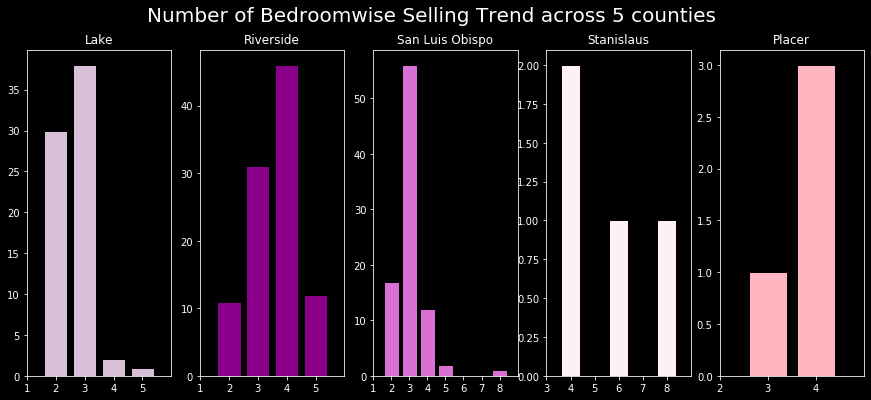

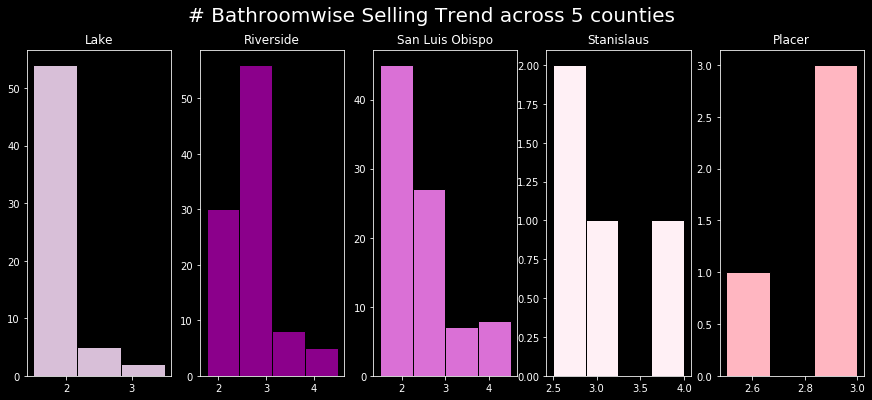

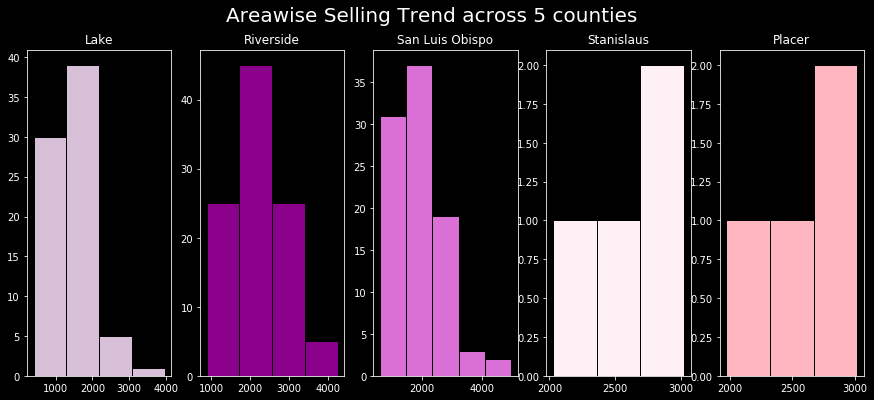

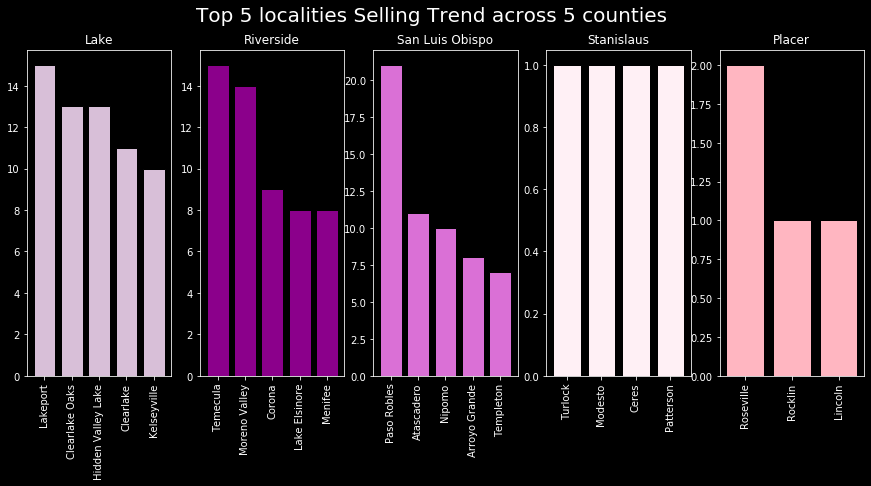

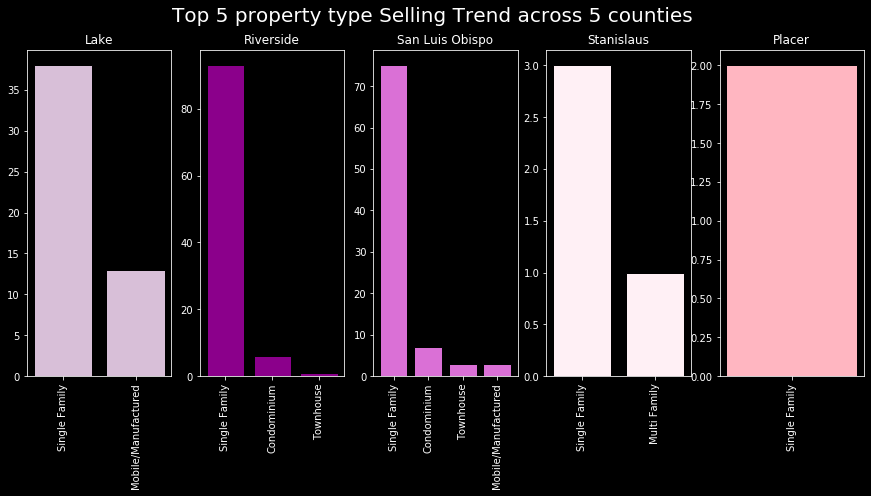

In [5]:
#Pick Top 5 Counties and analyse the buying trend
#Image(filename="Title3.png",width=900, height=50)
county_names=list(dict_hike.keys())
county_top5=county_names[-5:]

#colors = ['pink', 'lightskyblue','yellowgreen','gold','red']
colors = ['thistle', 'darkmagenta','orchid','lavenderblush','lightpink']
def property_beds():
    with plt.style.context('dark_background'):
        fig=plt.figure(figsize=(15,6)) #Create a figure object
        fig.suptitle("Number of Bedroomwise Selling Trend across 5 counties",size=20)
        for c in range(1,6):
            f=fig.add_subplot(1,5,c)
            #dfs.beds<15 removes outliers
            data=dict(dfs.beds[(dfs.county==county_top5[c-1]) & (dfs.beds<15)].value_counts().head())
            x=data.keys()
            y=data.values()
            xticks=int(max(x))
            f.bar(x,y,edgecolor='k',color=colors[c-1])
            f.set_title(county_top5[c-1])
            f.set_xticks(range(xticks+1))
            f.set_xlim(min(x)-1,max(x)+1)
  #  plt.show()
    
def property_baths():
    #Creates bin for baths. Plotting histogram to capture range of bathroom sizes
    with plt.style.context('dark_background'):
        fig=plt.figure(figsize=(15,6)) #Create a figure object
        fig.suptitle("# Bathroomwise Selling Trend across 5 counties",size=20)      
        for c in range(1,6):
            f=fig.add_subplot(1,5,c)
            dfs_baths=dfs.baths[(dfs.county==county_top5[c-1]) & (dfs.baths<10)]
            data=dict(dfs_baths.value_counts())
            x=data.keys()
            num_bins=int(max(x))
            f.hist(dfs_baths,num_bins,color=colors[c-1],edgecolor='k')
            f.set_title(county_top5[c-1])
    plt.show()
    
    
def property_area():
    with plt.style.context('dark_background'):
        fig=plt.figure(figsize=(15,6)) #Create a figure object
        fig.suptitle("Areawise Selling Trend across 5 counties",size=20)

        for c in range(1,6):
            f=fig.add_subplot(1,5,c)
            dfs_area=dfs.area[dfs.county==county_top5[c-1]]
            data=dict(dfs_area.value_counts())
            x=data.keys()
            num_bins=int(round(max(x), -3)/1000)
            f.hist(dfs_area,num_bins,color=colors[c-1],edgecolor='k')
            f.set_title(county_top5[c-1])
    plt.show()    
    
def property_locality():
    with plt.style.context('dark_background'):
        fig=plt.figure(figsize=(15,6)) #Create a figure object
        fig.suptitle("Top 5 localities Selling Trend across 5 counties",size=20)
        for c in range(1,6):
            f=fig.add_subplot(1,5,c)
            data=dict(dfs.locality[dfs.county==county_top5[c-1]].value_counts().head(5))
            x=data.keys()
            y=data.values()
            f.bar(x,y,edgecolor='k',color=colors[c-1])
            f.set_xticklabels(x,rotation=90)
            f.set_title(county_top5[c-1])
    plt.show()

def property_type():
    with plt.style.context('dark_background'):
        fig=plt.figure(figsize=(15,6)) #Create a figure object
        fig.suptitle("Top 5 property type Selling Trend across 5 counties",size=20)
        for c in range(1,6):
            f=fig.add_subplot(1,5,c)
            data=dict(dfs.type[dfs.county==county_top5[c-1]].value_counts().head(5))
            x=data.keys()
            y=data.values()
            f.bar(x,y,edgecolor='k',color=colors[c-1])
            f.set_xticklabels(x,rotation=90)
            f.set_title(county_top5[c-1])
        
    plt.show()


property_beds()
property_baths()
property_area()
property_locality()
property_type()


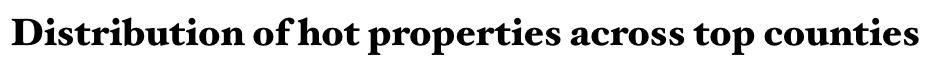

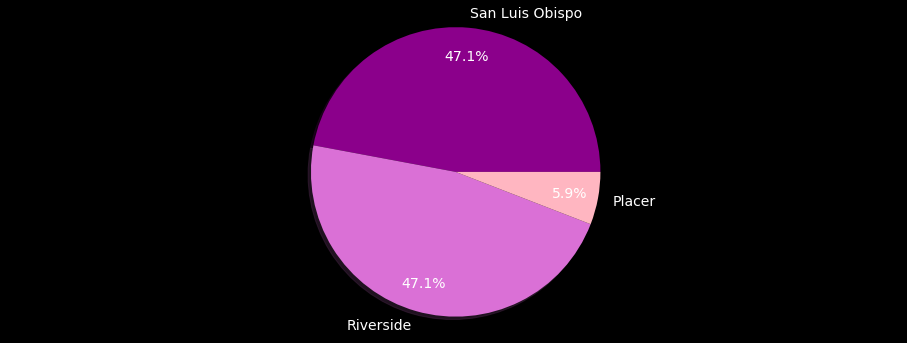

In [6]:
#Use the Sell Trend in top 5 counties and find the new listings that match the selling trend
import matplotlib as mpl
mpl.rcParams['font.size'] = 14.0
df_six_c = dfn.iloc[:,:][dfn.county.isin(county_top5)]

df_hot_property_lake = df_six_c[(df_six_c.area<=2000) & (df_six_c.beds.isin([2,3])) & (df_six_c.baths<=2)
                                    & (df_six_c.type=='Single Family') & (df_six_c.locality.isin(['Lakeport']))]

df_hot_property_riverside = df_six_c[(df_six_c.area<=3000) & (df_six_c.beds.isin([3,4])) & (df_six_c.baths<=3) 
                                     & (df_six_c.type=='Single Family') & (df_six_c.locality.isin(['Temecula'])) ]

df_hot_property_sanlouis = df_six_c[(df_six_c.area<=3000) & (df_six_c.beds==3) & (df_six_c.baths<=3) 
                                    & (df_six_c.type=='Single Family') & (df_six_c.locality.isin(['Paso Robles'])) ]

 

df_hot_property_stansislaus = df_six_c[(df_six_c.area<=3000) & (df_six_c.beds.isin([3,4]))  & (df_six_c.baths<=3) 
                                & (df_six_c.type=='Single Family') & (df_six_c.locality.isin(['Turlock']))]


df_hot_property_placer = df_six_c[(df_six_c.area<=3000) & (df_six_c.beds.isin([3,4])) & (df_six_c.baths<=3) 
                                   & (df_six_c.type=='Single Family') & (df_six_c.locality.isin(['Roseville'])) ]




#Make a new DataFrame "Hot Property" that has all properties listed which matches the previous buying trends
df_hot_property=pd.concat([df_hot_property_lake, df_hot_property_stansislaus,df_hot_property_placer,df_hot_property_riverside,df_hot_property_sanlouis], axis=0)


#Plot a pie chart to depict percent contribution of hot properties by county
data=dict(df_hot_property.county.value_counts())

sizes = data.values()
county_l= data.keys()

colors = ['darkmagenta', 'orchid', 'lightpink']
with plt.style.context('dark_background'):
    fig1, ax1 = plt.subplots(figsize=(16,6)) 
    ax1.pie(sizes, labels=county_l,colors=colors,autopct='%.1f%%',pctdistance = 0.8,shadow=True, startangle=0,frame = False)
    ax1.axis('equal')  
Image(filename="Title4.png",width=500, height=50)
#plt.show()

## Analysis 3 - From the Hot Properties, prediction the Best Properties for investment


In [7]:
best_property=pd.DataFrame()
for county in county_top5:
    best_property=pd.concat([best_property,df_hot_property[(df_hot_property.county==county) & (df_hot_property.per_sq_ft<sold_avg[county])]])


In [8]:
best_property

,address,locality,region,postal_code,price,beds,baths,per_sq_ft,area,on_redfin,...,lot_size,stories,county,walkable,walkable Score,transit,transit score,bikeable,bikeable score,# of schools
2335,40433 Corrigan Pl,Temecula,CA,92591,535000,4.0,2.5,183.0,2926.0,1,...,"4,792 square feet",NaN,Riverside,Car-Dependent,29.0,Minimal Transit,33.0,Somewhat Bikeable,31.0,3
1430,940 Austin Ct,Paso Robles,CA,93446,479500,3.0,2.0,273.0,1756.0,4,...,"9,800 square feet",NaN,San Luis Obispo,Car-Dependent,31.0,NaN,NaN,Somewhat Bikeable,27.0,3
1446,5082 Meadow Lark Ln,Paso Robles,CA,93446,499000,3.0,2.5,207.0,2409.0,1,...,"4,500 square feet",NaN,San Luis Obispo,Car-Dependent,5.0,NaN,NaN,Somewhat Bikeable,1.0,2
1463,1932 Tulipwood Dr,Paso Robles,CA,93446,550000,3.0,3.0,318.0,1728.0,1,...,"6,970 square feet",NaN,San Luis Obispo,Car-Dependent,38.0,NaN,NaN,Somewhat Bikeable,32.0,3
1481,524 Playa Cir,Paso Robles,CA,93446,429000,3.0,2.5,287.0,1497.0,4,...,"2,223 square feet",NaN,San Luis Obispo,Car-Dependent,17.0,NaN,NaN,Somewhat Bikeable,15.0,3
1482,1934 Tulipwood Dr,Paso Robles,CA,93446,550000,3.0,3.0,318.0,1728.0,4,...,"6,969 square feet",NaN,San Luis Obispo,Car-Dependent,38.0,NaN,NaN,Somewhat Bikeable,32.0,3
1487,1806 Rambouillet Rd,Paso Robles,CA,93446,609000,3.0,2.0,299.0,2034.0,4,...,"8,000 square feet",NaN,San Luis Obispo,Car-Dependent,16.0,NaN,NaN,Somewhat Bikeable,24.0,3


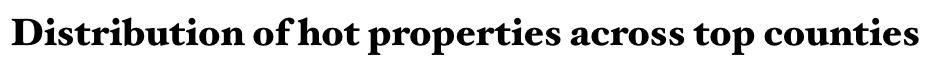

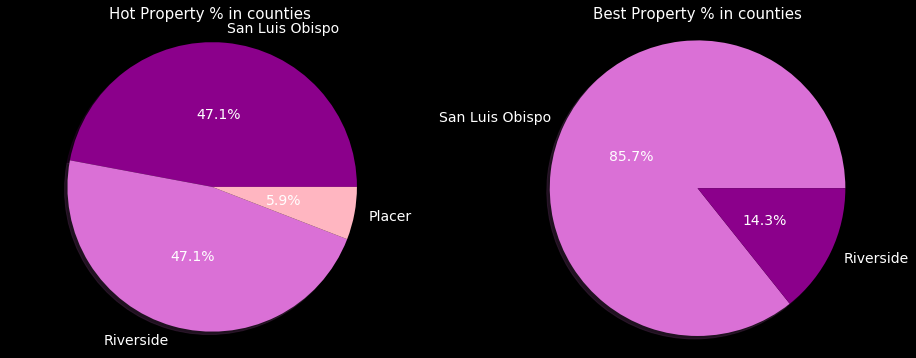

In [9]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 14.0
data_hot=dict(df_hot_property.county.value_counts())
data_best=dict(best_property.county.value_counts())

sizes_hot = data_hot.values()
county_hot= data_hot.keys()

sizes_best = data_best.values()
county_best= data_best.keys()


colors_hot = ['darkmagenta', 'orchid', 'lightpink']
colors_best = ['orchid','darkmagenta']

with plt.style.context('dark_background'):
    fig, ax = plt.subplots(1,2,figsize=(16,6)) 
    ax[0].pie(sizes_hot, labels=county_hot,colors=colors_hot,autopct='%.1f%%',pctdistance = 0.5,shadow=True, startangle=0,frame = False)
    ax[0].axis('equal') 
    ax[0].set_title("Hot Property % in counties",size=15)
    
    ax[1].pie(sizes_best, labels=county_best,colors=colors_best,autopct='%.1f%%',pctdistance = 0.5,shadow=True, startangle=0,frame = False)
    ax[1].axis('equal')
    ax[1].set_title("Best Property % in counties",size=15)
Image(filename="Title4.png",width=500, height=50)
#plt.show()

## Additional Visualization and highlights of the project

### 1. California Map using scatter plot, latitude, longitude and image

In [ ]:
#This need not be run everytime. One time activity to capture latitude and longitude and save it in an excel

from geopy.geocoders import Nominatim
#df_hot_property=pd.read_excel('hotproperty.xlsx')
locations=[]
lat=[]
lot=[]
address=list(df_hot_property.address)
city=list(df_hot_property.locality)
for i in range(len(city)):
    locations.append(address[i] +","+ city[i]+", USA")

for location in locations:
    locator = Nominatim(user_agent="myGeocoder")
    temp = locator.geocode(location)
    if temp:
        lat.append(temp.latitude)
        lot.append(temp.longitude)
    else:
        lat.append(35)
        lot.append(-120)
df_hot_property['latitude']=lat
df_hot_property['longitude']=lot
writer=pd.ExcelWriter('hotproperty_3.xlsx') # Create an excel called 'test4.xlsx'
df_hot_property.to_excel(writer,'XYZ')
writer.save()

In [ ]:
#This need not be run everytime. One time activity to capture latitude and longitude for best property and save it in an excel
from geopy.geocoders import Nominatim
locations_best=[]
lat_best=[]
lot_best=[]
address_best=list(best_property.address)
city_best=list(best_property.locality)
for i in range(len(city_best)):
    locations_best.append(address_best[i] +","+ city_best[i]+", USA")

for location in locations_best:
    locator = Nominatim(user_agent="myGeocoder")
    temp = locator.geocode(location)
    if temp:
        lat_best.append(temp.latitude)
        lot_best.append(temp.longitude)
    else:
        lat_best.append(35)
        lot_best.append(-120)
best_property['latitude']=lat_best
best_property['longitude']=lot_best
writer=pd.ExcelWriter('best_property.xlsx') # Create an excel called 'test4.xlsx'
best_property.to_excel(writer,'XYZ')
writer.save()

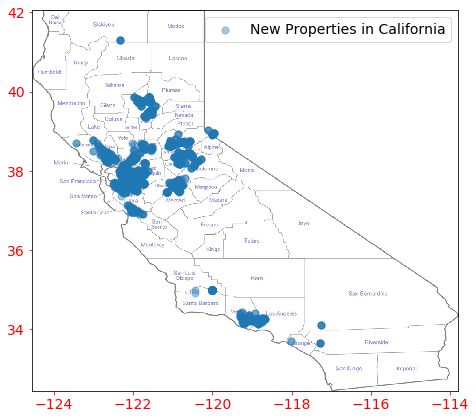

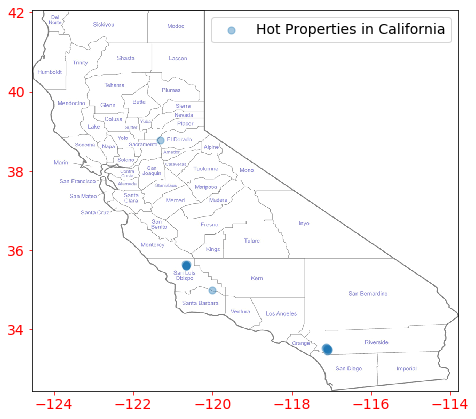

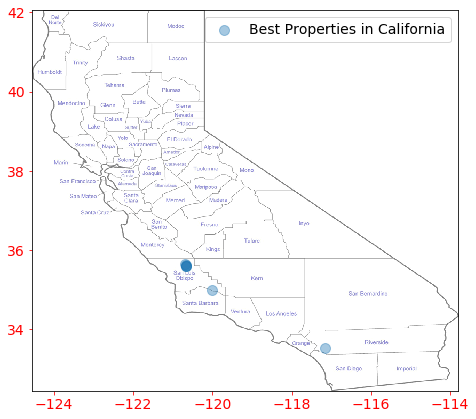

In [14]:
import matplotlib.image as mpimg
df_hot_property=pd.read_excel('hotproperty_3.xlsx')
df_best_property=pd.read_excel('best_property.xlsx')
df_new_property=pd.read_excel('new_property_latlong.xlsx')
#california_img=mpimg.imread('california-outline-png-2.png')
california_img=mpimg.imread('cacountymap.gif')


ax= df_new_property.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=50, label="New Properties in California",
                       cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("", fontsize=14)
plt.xlabel("", fontsize=14)
plt.tick_params(colors='r')

bx= df_hot_property.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=50, label="Hot Properties in California",
                       cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("", fontsize=14)
plt.xlabel("", fontsize=14)
plt.tick_params(colors='r')

cx = df_best_property.plot(kind="scatter", x="longitude", y="latitude", figsize=(26,7),
                       s=100, label="Best Properties in California",
                       cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("", fontsize=14)
plt.xlabel("", fontsize=14)
plt.tick_params(colors='r')
plt.show()

### 2. Interactive graph for end user to check the result based on his selection

In [22]:
price=np.arange(100000,900000,50000)
beds=np.arange(3,5,1)
baths=np.arange(2,5,0.5)


min_price=widgets.Dropdown(options=price,value=price[0],description='Min Price')

max_price=widgets.Dropdown(options=price,value=price[-1],description='Max Price')

beds=widgets.Dropdown(options=beds,value=beds[-1],description='Beds <=')

baths=widgets.Dropdown(options=baths,value=baths[-1],description='Baths <=')

def plotit(min_price,max_price,beds,baths):
    df2 = dfn.copy()
    if len(df2) > 0:
        data=dict(df2.county[(df2.price>=min_price) & (df2.price<=max_price) & (df2.beds<=beds) & (df2.baths<=baths)].value_counts())
        x=data.keys()
        y=data.values()
        fig, ax = plt.subplots(figsize=(20, 10))
        ax.bar(x,y,edgecolor='k',color='grey')
        ax.set_xticklabels(x,rotation=45)
        ax.set_title("Interactive Graph for User Selection", size=23)
        plt.show();
    else:
        print("No data to show for current selection")


interactive(plotit,min_price=min_price,max_price=max_price,beds=beds,baths=baths)   



interactive(children=(Dropdown(description='Min Price', options=(100000, 150000, 200000, 250000, 300000, 35000…

### 3 Interactive crosstab graph to compare hot properties based on commute score

In [36]:
Image(filename="Title5.png",width=500, height=50)        
options=['All','walkable','transit','bikeable']

option_widget = widgets.Dropdown(options=options,value='All',description='Filter By:')

    
def plotit(option_search):
    with plt.style.context('dark_background'):
        if option_search=='All':
            ct1=pd.crosstab(df_hot_property.county,df_hot_property['walkable'])
            ct2=pd.crosstab(df_hot_property.county,df_hot_property['transit'])
            ct3=pd.crosstab(df_hot_property.county,df_hot_property['bikeable'])
            fig,ax=plt.subplots(1,3,figsize=(16,6))
            fig.suptitle("Hot Property Commutation Score",size=20)
            ct1.plot(kind='bar', ax=ax[0],stacked=True)
            ct2.plot(kind='bar', ax=ax[1],stacked=True)
            ct3.plot(kind='bar', ax=ax[2],stacked=True)
        else:
            ct=pd.crosstab(df_hot_property.county,df_hot_property[option_search])
            ct.plot(kind='bar',stacked=True)
        

interactive(plotit,option_search=option_widget)

interactive(children=(Dropdown(description='Filter By:', options=('All', 'walkable', 'transit', 'bikeable'), v…